# Variational Monte Carlo

The main ingredient is a trial wave function $|\psi _{T}(\overline{\eta }
)\rangle $, that depends on a set of parameters $\overline{\eta }$. This
wave function is represented in terms of a basis of orthogonal states $
|x\rangle$ 
$$
|\psi _{T}(\overline{\eta })\rangle =\sum_{x}\langle x|\psi _{T}(\overline{
\eta })\rangle |x\rangle =\sum_{x}C_{x}(\overline{\eta })|x\rangle ,
$$
where the coefficients of the parametrization are known functions of $%
\overline{\eta }$. We would like the wave function to be a good
representation of the actual ground state of a model. Finding the best wave
function means finding the right set of parameters $\overline{\eta }$ that
maximize the overlap with the actual ground state. In practice this is
impossible since we do not know the groud state \textit{a priori}, and
some physical insight is needed to derive a good analytical
approximation. Then we apply the variational principle, that states
that the variational energy of the trial state is always greater or equal to
the exact energy of the ground state:
\begin{equation}
\langle E\rangle _{T}=\frac{\langle \psi _{T}\mid H\mid \psi _{T}\rangle }{%
\langle \psi _{T}\mid \psi _{T}\rangle }\geq E_{0},
\label{energia variacional}
\end{equation}
and we use the criterium of minimizing the variational energy. In order to
do that we require to calculate this quantity for different sets of
parameters $\overline{\eta }$, and once we found a proper wave function, we
can calculate the physical quantities of interest.

The expectation value of an arbitrary operator $O$ is
\begin{eqnarray}
\langle O\rangle _{Var} &=&\frac{\langle \psi _{T}\mid O\mid \psi
_{T}\rangle }{\langle \psi _{T}\mid \psi _{T}\rangle }  \nonumber \\
&=&\frac{\sum_{x}\langle \psi _{T}\mid x\rangle \langle x\mid O\mid \psi
_{T}\rangle }{\sum_{x}\langle \psi _{T}\mid x\rangle \langle x\mid \psi
_{T}\rangle } \\
&=&\frac{\sum_{x}\left| \langle \psi _{T}\mid x\rangle \right|
^{2}\sum_{x^{\prime }}\langle x\mid O\mid \psi _{T}\rangle /\langle x\mid
\psi _{T}\rangle }{\sum_{x}\left| \langle \psi _{T}\mid x\rangle \right| ^{2}%
}  \nonumber \\
&=&\sum_{x}P_{x}O_{x},  \label{valor medio}
\end{eqnarray}
with
\begin{equation}
P_{x}=\frac{\left| \langle \psi _{T}\mid x\rangle \right| ^{2}}{%
\sum_{x}\left| \langle \psi _{T}\mid x\rangle \right| ^{2}},  \label{P}
\end{equation}
and
\begin{equation}
O_{x}=\frac{\langle x\mid O\mid \psi _{T}\rangle }{\langle x\mid \psi
_{T}\rangle }.  \label{o}
\end{equation}
The equation (\ref{valor medio}) has precisely the form of a mean value in
statistical mechanics, with $P_{x}$ as the Boltzmann factor:
$$
P_{x}\geq 0;\,\sum_{x}P_{x}=1.
$$
The first step in order to calculate it consists of generating a collection
of configurations distributed according to this probability. For that
purpose we employ the Metropolis algorithm: starting from a configuration $
|x\rangle $, we accept a new configuration $|x^{\prime }\rangle $ with
probability $R=\left| \langle \psi _{T}\mid x^{\prime }\rangle \right|
^{2}/\left| \langle \psi _{T}\mid x\rangle \right| ^{2}$, or $1/(1+R)$ if we
use the heat bath approach.

The variational simulations are simple to perform and very stable.
Since the probabilities do not deppend on the statistics of the particles
involved, they do not suffer from the sign problem. However,
the results deppend decisively of the
quality of the variational wave function, because they are completely
pre-determined by it, and the physical arguments that define it. In the
particular situation in which the trial function coincides with the exact
ground state, the matrix elements (\ref{o}) for $O=H$ are all equal to $%
E_{0}:$%
$$
E_{x}=\frac{\langle x\mid H\mid \psi _{T}\rangle }{\langle x\mid \psi
_{T}\rangle }=E_{0}.
$$
This is the property called "zero variance": the more the wave function
resembles the actual ground state, the more rapidly the variational enery
converges with the number of iterations.

In general, the computation results more complicated, or numerically more
expensive, when the number of \ variational parameters $\overline{\eta }$
that define the trial state is large. Thus, we always try to keep the form
of the wave function simple enough and with only a few variational degrees
of freedom.

## Quantum Spin Chain

We seek a good representaiton of the ground state wave function for $L$ spins interacting via a Heisenberg Hamiltonian:
$${H}=\sum_{i=1}^{N-1}
{S}^z_i {S}^z_{i+1} -
\frac{1}{2}\left[
{S}^+_i {S}^-_{i+1} +
{S}^-_i {S}^+_{i+1}
\right]
$$
Notice the minus sign in the off diagonal term. This results from a unitary transformation called "Marshall rotation". As a consequence, all coefficients in the wave-function are positive and real, and we don't have to worry about complex phases nor signs.
As we learned in previous lectures, we can only solve the problem extraclty for a small number of spins (in reality, there is an exact analytical solution called "Bethe Ansatz"). We will now learn how to solve the problem using a variational approximation to the ground state. Leaving aside the justification for our choice of wave function, we introduce the so-called Jastrow wave-function:
$$
|\Psi\rangle = \sum_{\bar{\sigma}} \exp\left({\alpha\sum_{i>j}\frac{S_i^zS_j^z}{|i-j|}}\right)|\bar{\sigma}\rangle,
$$

where $\sigma=\pm 1/2$ represents the orientation of the spins along the $z$ axis. This expression enjoys an elegant simplicity, and depends on only one free variational parameter $\alpha$. We start our simulation by chosing a pair of spins; if anti-parallel, we atempt a spin flip. The acceptance probability is determined by the ratio $|\Psi(\bar{\sigma}')|^2/|\Psi(\bar{\sigma})|^2$, where $\Psi(\bar{\sigma})=\exp\left({\alpha\sum_{i>j}\frac{\sigma_i \sigma_j}{|i-j|}}\right)$. Notice that this probability reminds us of a Boltzmann factor with inverse temperature $\alpha$ and classical Ising-like Hamiltonian $H'=\sum_{i>j}\frac{S_i^zS_j^z}{|i-j|}$. Therefore, in order to implement the code, we only have to introduce minor modifications to our previous Monte Carlo code for the Ising model. There are some important changes: (i) Since we are only inetrested in the sector with zero total spin $S^z=0$, we pick spins in pairs and we attempt spin flips that preserve the total magnetization; (ii) The interactions in the effective classical Hamiltonian are long-range, (iii) more importantly, the expression for the energy involves the actual quantum Hamiltonian and we need to account for all possible spin flips to evaluate the expression for the "local energy":
$$E_\bar{\sigma} = \frac{\langle \bar{\sigma}|H|\Psi\rangle}{\langle \bar{\sigma}|\Psi\rangle}=\sum_i\frac{\langle \bar{\sigma}|S^z_iS^z_{i+1}|\Psi\rangle}{\langle \bar{\sigma}|\Psi\rangle}-\frac{1}{2}\sum_i\frac{\langle \bar{\sigma}|S^+_iS^-_{i+1}+S^-_iS^+_{i+1}|\Psi\rangle}{\langle \bar{\sigma}|\Psi\rangle}$$
The last term involves all the allowed spin flips between nearest neighbors, and has at most $L$ non-zero contributions.

In [227]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import matplotlib.animation as animation

class Direction:
    RIGHT, LEFT = range(2)

def distance(r,L):
    return abs(abs(r)-L*int(2*abs(r)/L))
    
class VMC(object):
    
    def __init__ (self, L, alpha):
      
        self.L = L
        self.alpha = alpha
        # Table for probabilities
        self.psi2 = np.zeros(shape=(3,int(L/2+1)))
        
        # Initialize neighbors table for boundary conditions
        self.nn = np.zeros(shape=(self.L,2), dtype=np.int16)

        # Periodic boundary conditions
        for ix in range(L):
            self.nn[ix,Direction.LEFT] = ix-1
            self.nn[ix,Direction.RIGHT] = ix+1

        self.nn[0,Direction.LEFT] = L-1
        self.nn[L-1,Direction.RIGHT] = 0

        # Initialize spins
        self.spin = np.ones(self.L, dtype=np.int16)
        pos = np.random.choice(range(L), int(L/2), replace=False) # we pick L/2 unique random positions and flip
        for ix in pos:
            self.spin[pos] = -1
        
        self.set_alpha(alpha)
                                                             
    def set_alpha(self, alpha):
        self.alpha = alpha
        # Lookup tables for transition probabilities
        # Pair-wise contribution to the argument in the exponential
        for i in range(-1,2,2):
            for l in range(1,int(self.L/2)+1):
                self.psi2[i+1,l] = self.alpha*i*0.25/l
        
    def metropolis(self):
        nchanges = 0

        # trial spin change
        # pick a random pair of spins
        i = 0
        j = 0
        while(self.spin[i] == self.spin[j]):
            i = int(np.random.random()*self.L)
            j = int(np.random.random()*self.L)

        si = self.spin[i]
        sj = self.spin[j]

        arg = 0.
        for k in range(self.L):
            sk = self.spin[k]
            if(i != k and k != j):
                arg += self.psi2[si*sk+1,distance(i-k,self.L)]
                arg += self.psi2[sj*sk+1,distance(j-k,self.L)]
        p = np.exp(-4*arg)
        if(p >= 1 or np.random.random() < p):
            self.spin[i] *= -1
            self.spin[j] *= -1
            nchanges += 1
        return nchanges
    
    def Psi(self, spins):
        arg = 0.
        for i in range(self.L):
            for j in range(i+1,self.L):
                si = spins[i]
                sj = spins[j]
                arg += self.psi2[si*sj+1,distance(i-j,self.L)]
        return np.exp(arg)
                
    def Eloc(self):
        Ediag = 0.
        Eoff = 0.
        for i in range(self.L):
            j = self.nn[i,Direction.RIGHT]
            si = self.spin[i]
            sj = self.spin[j]

            # Diagonal contribution
            Ediag += si*sj*0.25
            # Off diagonal contribution
            arg_flip = 0.
            if(si != sj):
                for k in range(self.L):
                    sk = self.spin[k]
                    if(i != k and k != j):
                        arg_flip += self.psi2[si*sk+1,distance(i-k,self.L)]
                        arg_flip += self.psi2[sj*sk+1,distance(k-j,self.L)]
            Eoff -= 0.5*np.exp(-2*arg_flip)
        return Ediag+Eoff
            
        
    def Eloc2(self):
        Ediag = 0.
        Eoff = 0.
        for i in range(self.L):
            j = self.nn[i,Direction.RIGHT]
            si = self.spin[i]
            sj = self.spin[j]

            # Diagonal contribution
            Ediag += si*sj*0.25
            # Off diagonal contribution
            arg_flip = 0.
            if(si != sj):
                aux_spin = self.spin
                aux_spin[i] *= -1
                aux_spin[j] *= -1
                Eoff -= 0.5*self.Psi(aux_spin)/self.Psi(self.spin)
        return Ediag+Eoff
            


In [228]:
system = VMC(8,-2)
for i in range(10):
    system.metropolis()
print(system.spin)

[ 1 -1 -1  1  1 -1 -1  1]


In [229]:
print(system.Eloc(),system.Eloc2())

-5.297442541400256 -3.0


In [231]:
%matplotlib inline
from matplotlib import pyplot

alphas=np.linspace(-6,6,20)
e0 = []
for a in alphas:
    Etot = 0.
    Nmeas = 0
    system.set_alpha(a)
    for i in range(50000):
        system.metropolis()
        if(i%10 == 0):
            Etot += system.Eloc2()
            Nmeas += 1
    print(a,Etot/Nmeas)
    e0.append(Etot/Nmeas)



-6.0 -2.8216
-5.368421052631579 -2.827
-4.7368421052631575 -2.8336
-4.105263157894737 -2.821
-3.473684210526316 -2.8076
-2.8421052631578947 -2.8042
-2.210526315789474 -2.7828
-1.578947368421053 -2.7382
-0.9473684210526319 -2.688
-0.3157894736842106 -2.614
0.3157894736842106 -2.5174
0.947368421052631 -2.4174
1.5789473684210522 -2.3366
2.2105263157894726 -2.293
2.842105263157894 -2.2764
3.473684210526315 -2.2778
4.105263157894736 -2.2846
4.7368421052631575 -2.2688
5.368421052631579 -2.267
6.0 -2.2746


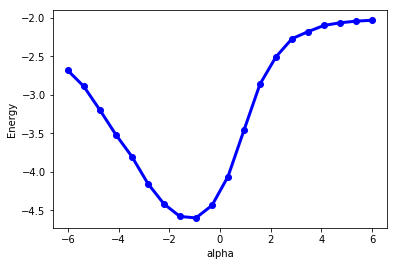

In [204]:
pyplot.xlabel("alpha")
pyplot.ylabel("Energy")
pyplot.plot(alphas,e0,'bo-',lw=3);

